In [32]:
import pathlib
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

plt.style.use('seaborn-v0_8')    # 使用样式
plt.rcParams['font.sans-serif'] = ['SimHei']     # 显示中文
plt.rcParams['axes.unicode_minus'] = False     # 显示负号


path_record = pathlib.Path('./my_douban_data/豆瓣读书记录_2024.md')

## 数据准备

In [3]:
year = int(re.search(r"\d{4}", path_record.stem).group(0))  # 从文件名获取年份信息

with open(path_record, encoding='utf-8') as f:
    content = f.read()

In [4]:
names = re.findall(r'### \[(.*?)\]\(', content)
links = re.findall(r'### .*?\((.*?)\)', content)
stars = [len(i) for i in re.findall(r'<font color.*?>(.*?)</font>', content)]

In [5]:
line1 = re.findall(r'\n> (.*?)\n>', content)
line2 = re.findall(r'\n> .*?\n> (.*?)\n', content)

# writers = [i.split(' / ')[0] for i in line1]
# publishers = [i.split(' / ')[1] for i in line1]
# publish_times = [i.split(' / ')[2] for i in line1]
# prices = [i.split(' / ')[3].replace('元', '') for i in line1]

read_dates = [i.split(' ')[0] for i in line2]
# labels = [re.search(r'标签: (.*)', i).group(1).split() for i in line2]
labels = ['' for i in line2]

In [6]:
df = pd.DataFrame({'书名': names, '评分': stars, '读完时间': read_dates, '标签': labels, '备注': line1, '豆瓣链接': links})
df['读完时间'] = pd.to_datetime(df['读完时间'])
df['月份'] = df['读完时间'].dt.month.astype(str) + '月'
df['月份'] = pd.Categorical(df['月份'], categories=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'])
df = df.sort_values('读完时间')
df['累计数量'] = 1
df['累计数量'] = df['累计数量'].cumsum()
df['书名'] = df['书名'].str.replace(': 日本小學館獨家授權香港中文版', '')
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量
49,AI 3.0,5,2024-01-20,,[美] 梅拉妮·米歇尔 / 王飞跃、李玉珂、王晓、张慧 / 四川科学技术出版社·湛庐 / 2...,https://book.douban.com/subject/35351678/,1月,1
48,阅读的故事,4,2024-01-28,,唐诺 / 上海人民出版社 / 2010年8月 / 32.00元,https://book.douban.com/subject/2377014/,1月,2
47,我们仨,4,2024-02-15,,杨绛 / 生活·读书·新知三联书店 / 2012-9 / 23.00元,https://book.douban.com/subject/19958089/,2月,3
46,基督山伯爵: 全3册,4,2024-02-16,,[法]大仲马 / 周克希 / 江苏凤凰文艺出版社 / 2018-9 / 168.00元,https://book.douban.com/subject/30297123/,2月,4
45,书店,3,2024-02-17,,(英)佩内洛普·菲兹杰拉德 / 尹晓冬 / 新星出版社 / 2010-3 / 20.00元,https://book.douban.com/subject/4703921/,2月,5
44,东京一年,3,2024-02-21,,蒋方舟、【日】伊藤王树 摄 / 中信出版社 / 2017-8 / 68.00元,https://book.douban.com/subject/27074861/,2月,6
43,洞见: 从科学到哲学，打开人类的认知真相,4,2024-03-16,,[美] 罗伯特·赖特 / 宋伟 / 北京联合出版公司 / 2020-8 / 78.00元,https://book.douban.com/subject/35140470/,3月,7
42,情色朝鮮: 那些被迫忍受、壓抑的韓國近代性慾實錄,3,2024-03-19,,朴永圭 / 徐小為 / PCuSER電腦人文化 / 2020-6-13 / NTD 460,https://book.douban.com/subject/35086548/,3月,8
41,中国古典名著 喻世名言: 《三言二拍》“三言”之一,3,2024-04-06,,冯梦龙 / 大众文艺出版社 / 2002-7-1 / 11.00元,https://book.douban.com/subject/1411845/,4月,9
40,巨流河,4,2024-04-14,,齐邦媛 / 生活·读书·新知三联书店 / 2010-10 / 39.00元,https://book.douban.com/subject/4842446/,4月,10


In [7]:
df.columns

Index(['书名', '评分', '读完时间', '标签', '备注', '豆瓣链接', '月份', '累计数量'], dtype='object')

In [8]:
df['作者'] = df['备注'].map(lambda x: x.split(' / ')[0])
df['评分'] = df['评分'].map(lambda x: '★' * x)
df1 = df[['书名', '作者', '评分', '读完时间']]
df1

,书名,作者,评分,读完时间
49,AI 3.0,[美] 梅拉妮·米歇尔,★★★★★,2024-01-20
48,阅读的故事,唐诺,★★★★,2024-01-28
47,我们仨,杨绛,★★★★,2024-02-15
46,基督山伯爵: 全3册,[法]大仲马,★★★★,2024-02-16
45,书店,(英)佩内洛普·菲兹杰拉德,★★★,2024-02-17
44,东京一年,蒋方舟、【日】伊藤王树 摄,★★★,2024-02-21
43,洞见: 从科学到哲学，打开人类的认知真相,[美] 罗伯特·赖特,★★★★,2024-03-16
42,情色朝鮮: 那些被迫忍受、壓抑的韓國近代性慾實錄,朴永圭,★★★,2024-03-19
41,中国古典名著 喻世名言: 《三言二拍》“三言”之一,冯梦龙,★★★,2024-04-06
40,巨流河,齐邦媛,★★★★,2024-04-14


In [9]:
with pd.ExcelWriter(f"{year}年读书小结.xlsx") as xlsx:
    df.to_excel(xlsx,sheet_name="小结1", index=False)
    df1.to_excel(xlsx,sheet_name="小结2", index=False)


## 可视化

In [66]:
df = pd.read_excel(path_record.parent / (f"{year}年读书小结.xlsx"))
df['读完时间'] = pd.to_datetime(df['读完时间'])
df['月份'] = pd.Categorical(df['月份'], categories=[f'{i}月' for i in range(1, 13)])
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量,作者
0,AI 3.0,★★★★★,2024-01-20,NaN,[美] 梅拉妮·米歇尔 / 王飞跃、李玉珂、王晓、张慧 / 四川科学技术出版社·湛庐 / 2...,https://book.douban.com/subject/35351678/,1月,1,[美] 梅拉妮·米歇尔
1,阅读的故事,★★★★,2024-01-28,NaN,唐诺 / 上海人民出版社 / 2010年8月 / 32.00元,https://book.douban.com/subject/2377014/,1月,2,唐诺
2,我们仨,★★★★,2024-02-15,NaN,杨绛 / 生活·读书·新知三联书店 / 2012-9 / 23.00元,https://book.douban.com/subject/19958089/,2月,3,杨绛
3,基督山伯爵: 全3册,★★★★,2024-02-16,NaN,[法]大仲马 / 周克希 / 江苏凤凰文艺出版社 / 2018-9 / 168.00元,https://book.douban.com/subject/30297123/,2月,4,[法]大仲马
4,书店,★★★,2024-02-17,NaN,(英)佩内洛普·菲兹杰拉德 / 尹晓冬 / 新星出版社 / 2010-3 / 20.00元,https://book.douban.com/subject/4703921/,2月,5,(英)佩内洛普·菲兹杰拉德
5,东京一年,★★★,2024-02-21,NaN,蒋方舟、【日】伊藤王树 摄 / 中信出版社 / 2017-8 / 68.00元,https://book.douban.com/subject/27074861/,2月,6,蒋方舟、【日】伊藤王树 摄
6,洞见: 从科学到哲学，打开人类的认知真相,★★★★,2024-03-16,NaN,[美] 罗伯特·赖特 / 宋伟 / 北京联合出版公司 / 2020-8 / 78.00元,https://book.douban.com/subject/35140470/,3月,7,[美] 罗伯特·赖特
7,情色朝鮮: 那些被迫忍受、壓抑的韓國近代性慾實錄,★★★,2024-03-19,NaN,朴永圭 / 徐小為 / PCuSER電腦人文化 / 2020-6-13 / NTD 460,https://book.douban.com/subject/35086548/,3月,8,朴永圭
8,喻世名言: 《三言二拍》“三言”之一,★★★,2024-04-06,NaN,冯梦龙 / 大众文艺出版社 / 2002-7-1 / 11.00元,https://book.douban.com/subject/1411845/,4月,9,冯梦龙
9,巨流河,★★★★,2024-04-14,NaN,齐邦媛 / 生活·读书·新知三联书店 / 2010-10 / 39.00元,https://book.douban.com/subject/4842446/,4月,10,齐邦媛


c:\Users\Administrator\anaconda3\Lib\site-packages\mizani\breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


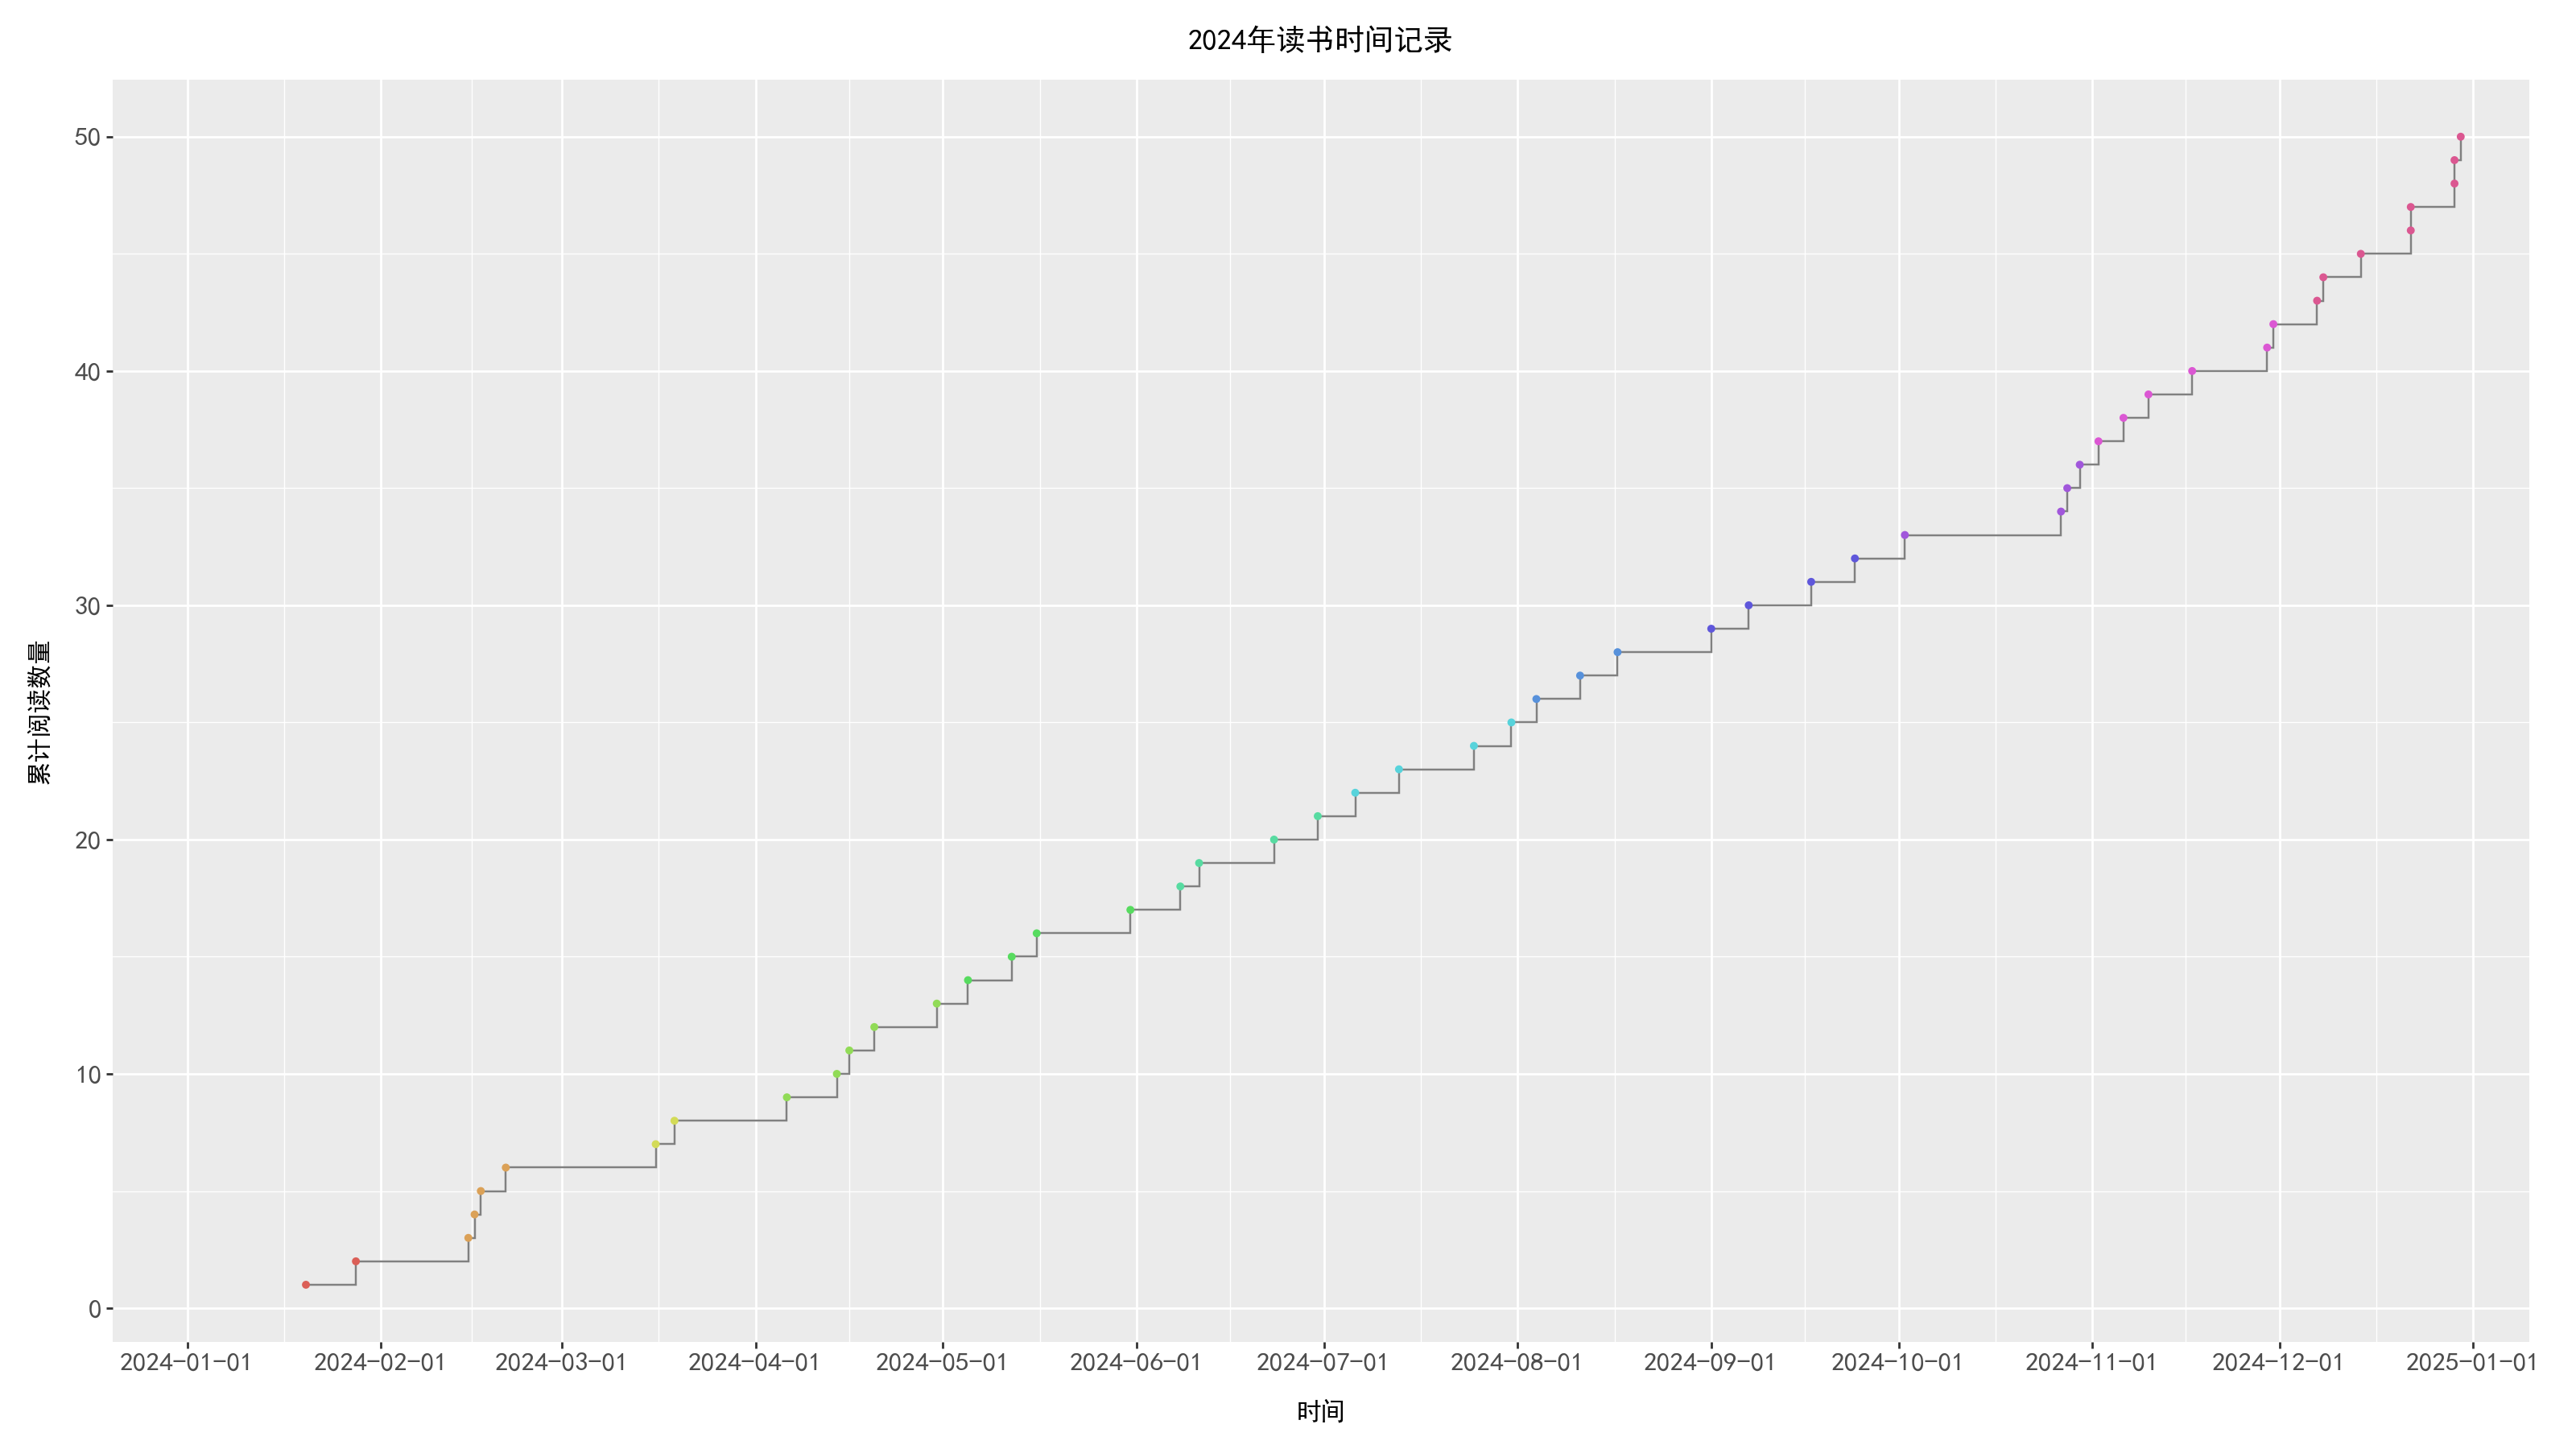

In [67]:
(ggplot(df, aes(x='读完时间', y='累计数量'))
    + geom_step(color='grey')
    + geom_point(aes(color='月份'), size=1)
    + scale_x_date(
        date_breaks='1 month',
        limits=[pd.to_datetime(f'2023-12-20'), pd.to_datetime(f'2025-01-10')],
        expand=(0, 0)
    )
    + labs(x='时间', y='累计阅读数量', title=f'{year}年读书时间记录')
    + guides(color=False)
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            figure_size=(16, 9))
)


c:\Users\Administrator\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_vline : Removed 1 rows containing missing values.


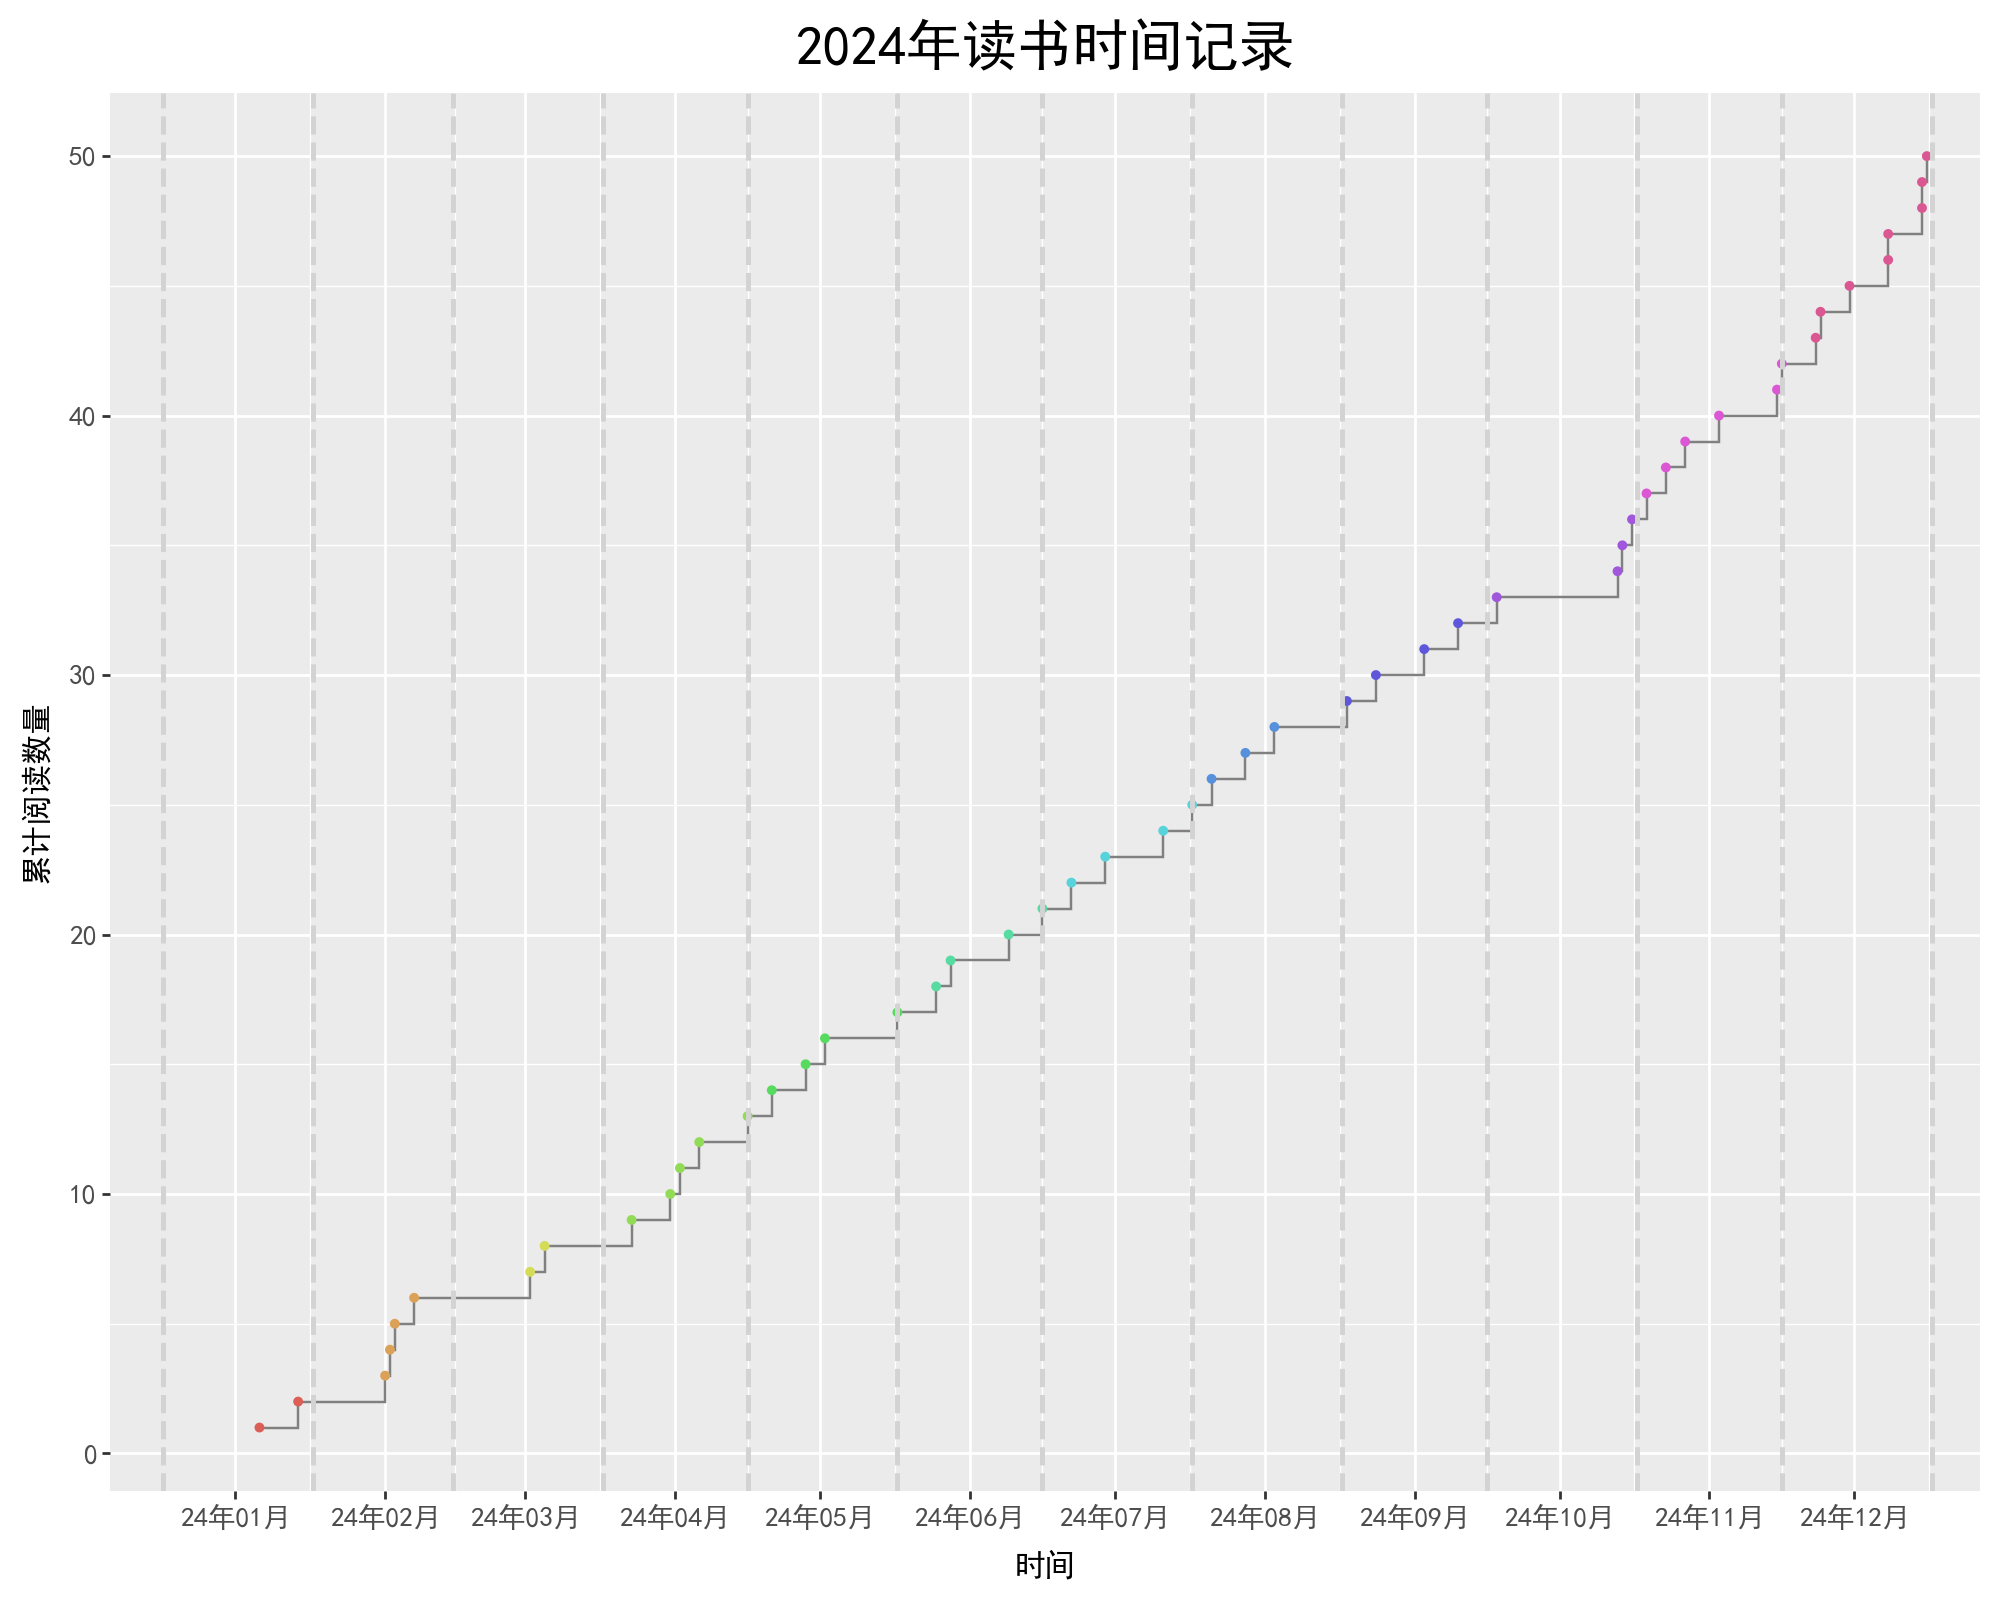

In [89]:
# 生成每个月的月初日期
# date_breaks = pd.date_range(start='2023-12-01', end='2025-01-31', freq='MS')  # 仅生成每个月的第一天

date_breaks = pd.date_range(start='2023-12-01', end='2025-01-31', freq='D')  # 生成范围内的所有日期
# date_breaks = date_breaks[(date_breaks.day == 1) | (date_breaks == date_breaks + pd.offsets.MonthEnd(0))]  # 筛选月初和月末
date_breaks = date_breaks[date_breaks == date_breaks + pd.offsets.MonthEnd(0)]  # 筛选月末

# 生成一个月的中间日期（用于刻度标记）
mid_month_breaks = pd.date_range(start='2023-12-15', end='2025-01-15', freq='MS') + pd.Timedelta(days=14)

(ggplot(df, aes(x='读完时间', y='累计数量'))
    + geom_step(color='grey')  # 主数据线
    + geom_point(aes(color='月份'), size=1)  # 数据点
    + geom_vline(xintercept=date_breaks, color='lightgrey', linetype='dashed', size=1)  # 添加灰色辅助线
    + scale_x_date(
        breaks=mid_month_breaks,  # 使用生成的中间日期作为刻度
        date_labels='%y年%m月',  # 格式化日期标签
        limits=[pd.to_datetime('2023-12-20'), pd.to_datetime('2025-01-10')],
        expand=(0, 0)
    )
    + labs(x='时间', y='累计阅读数量', title=f'{year}年读书时间记录')
    + guides(color=False)  # 隐藏颜色图例
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=10),
            axis_text_y=element_text(size=10),
            plot_title=element_text(size=20, face="bold"),  # 设置标题更大并加粗
            figure_size=(10, 8))
)


In [69]:
sns.color_palette("Set3", 12).as_hex()

['#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#ffed6f']

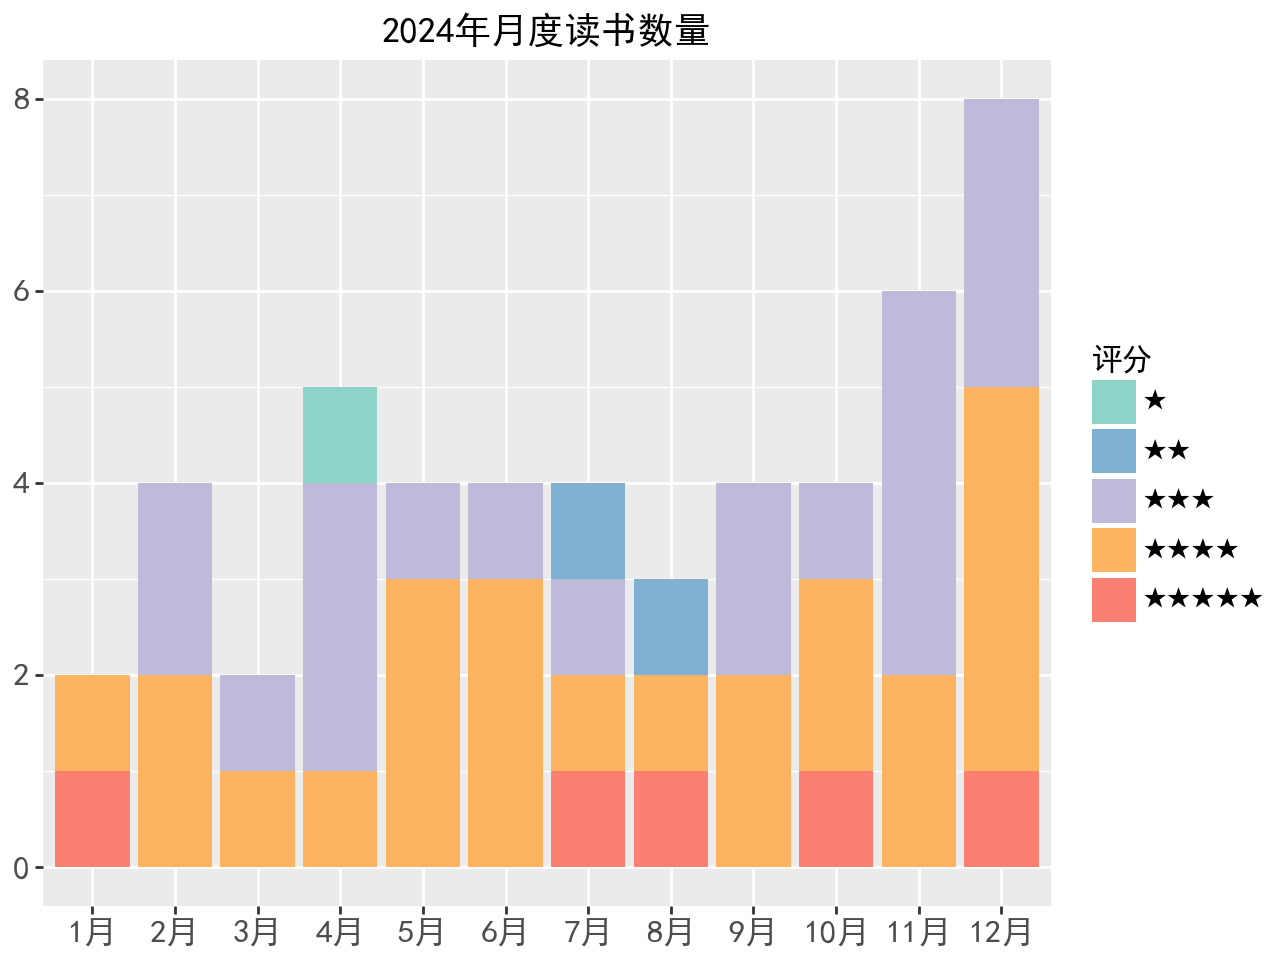

In [70]:
# colors = sns.color_palette("Reds").as_hex()
colors = [sns.color_palette("Set3", 12).as_hex()[i] for i in [0, 4, 2, 5, 3]]

(ggplot(df, aes(x='月份'))
    # + geom_bar(fill='lightblue')
    + geom_bar(aes(fill='factor(评分)', group='factor(评分)'))
    + scale_fill_manual(values=colors)
    + labs(x='', y='', title=f'{year}年月度读书数量', fill='评分')
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)


In [71]:
df_score = df.groupby('评分', as_index=False).count()[['评分', '书名']]
df_score['评分'] = df_score['评分'].map(len).astype(str) + '分'
df_score['评分'] = pd.Categorical(df_score['评分'], categories=reversed(['1分', '2分', '3分', '4分', '5分']))
df_score['x'] = 1
df_score

,评分,书名,x
0,1分,1,1
1,2分,2,1
2,3分,19,1
3,4分,23,1
4,5分,5,1


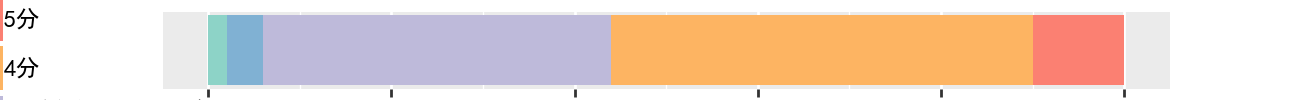

In [72]:
# colors_r = sns.color_palette("Reds_r").as_hex()
colors_r = list(reversed(colors))

(ggplot(df_score)
    + geom_col(aes(x='x', y='书名', fill='评分'))
    # + geom_text(aes(label='书名'), )
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    + scale_x_continuous(breaks=None)
    # + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

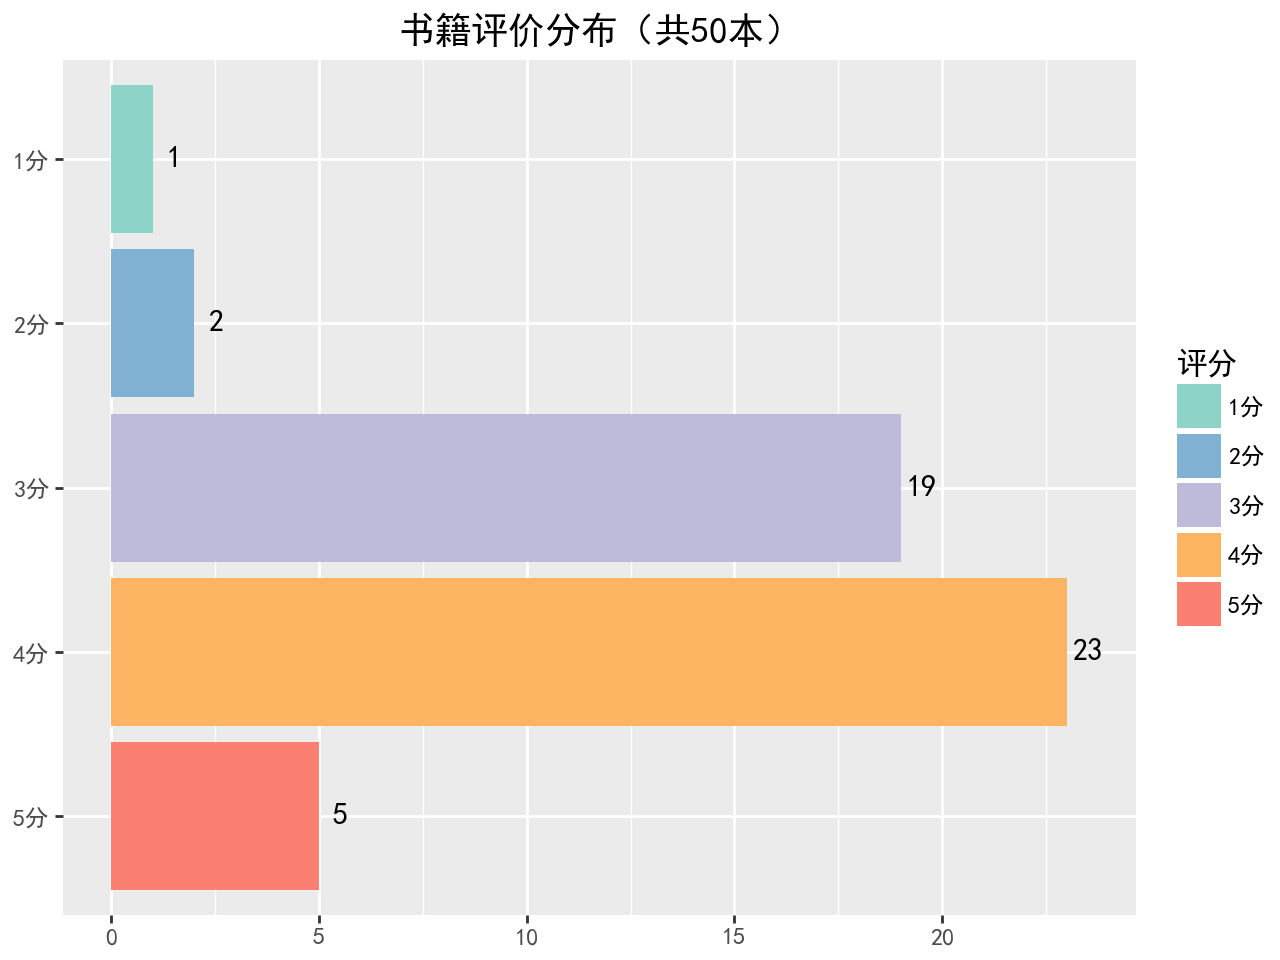

In [73]:
(ggplot(df_score, aes(x='评分', y='书名', fill='评分'))
    + geom_col()
    + geom_text(aes(label='书名', y='书名+.5'))
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    # + scale_x_continuous(breaks=None)
    + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            # figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

In [74]:
df_score.set_index('评分').plot.pie(y='书名', figsize=(6, 6), autopct='%1.0f%%', fontsize=12, legend=False)

<Axes: ylabel='书名'>

In [75]:
df_output = pd.DataFrame({'短评': 25, '长评': 25}, index=[0]).melt()
df_output.columns=['评论', '数量']
df_output

,评论,数量
0,短评,25
1,长评,25


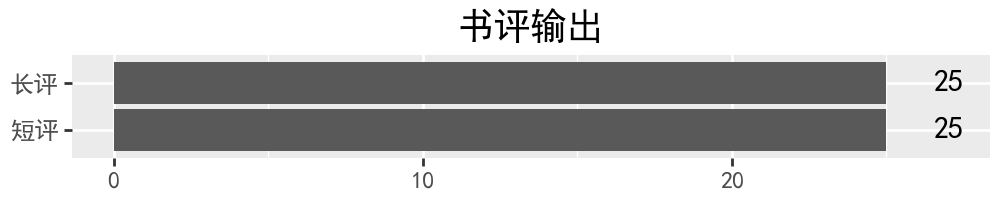

In [76]:
(ggplot(df_output, aes(x='评论', y='数量'))
    + geom_col()
    + geom_text(aes(label='数量', y='数量+2'))
    + labs(x='', y='', title=f'书评输出')
    + theme(text=element_text(family="SimHei"),
            figure_size=(5, 1),
            )
    + coord_flip()
)

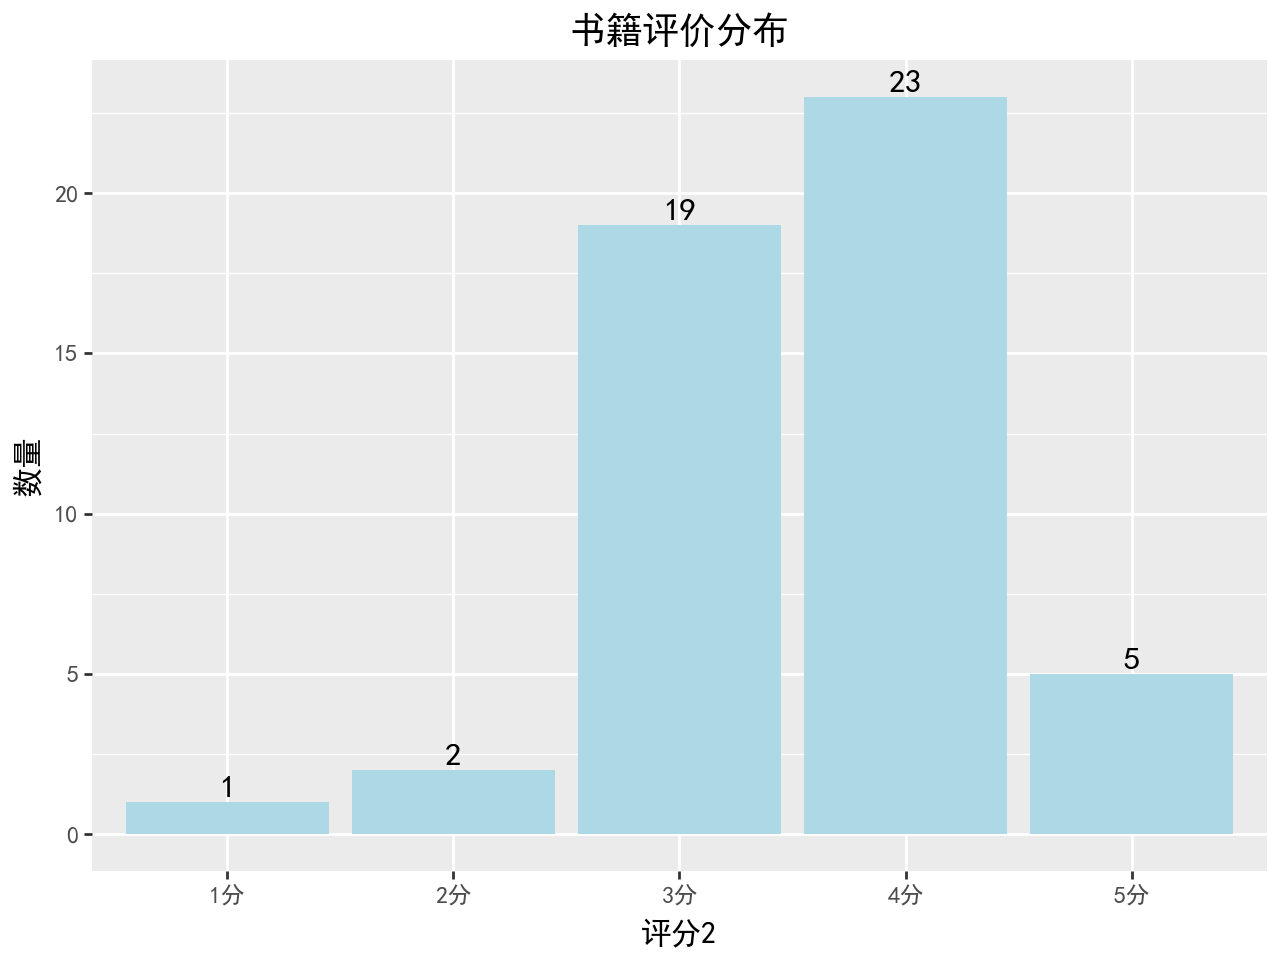

In [77]:
df_score['评分2'] = pd.Categorical(df_score['评分'], categories=['1分', '2分', '3分', '4分', '5分'])

(ggplot(df_score, aes(x='评分2', y='书名'))
    + geom_col(fill='lightblue')
    + geom_text(aes(label='书名'), size=12, va='bottom')
    + ggtitle('书籍评价分布')
    + ylab('数量')
    + theme(text=element_text(family="SimHei"))
)

In [78]:
df.query('评分==5')['书名']

Series([], Name: 书名, dtype: object)

In [82]:
# 定义颜色映射（使用更丰富的颜色）
color_map = {
    1: '#7ed6df',
    2: '#1abc9c',
    3: '#80B3FF',
    4: '#FFB366',
    5: '#e74c3c'
}

# 生成HTML内容
html_template = """<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>%(year)s年读书记录（%(count)d本）</title>
    <style>
        body {
            font-family: 'Microsoft YaHei', sans-serif;
            margin: 20px;
            background-color: #f5f5f5;
            line-height: 1.6;
        }
        .container {
            max-width: 800px;
            margin: 0 auto;
            background-color: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }
        .book {
            display: inline;
            padding: 2px 5px;
            margin: 2px;
            border-radius: 3px;
        }
        h1 {
            color: #333;
            text-align: center;
        }
    </style>
</head>
<body>
<div class="container">
    <h1>%(year)s年读书记录（%(count)d本）</h1>
    <div>
"""

html_content = html_template % {'year': year, 'count': len(df)}

# 添加书籍信息
for name, rating in zip(df['书名'], df['评分'].map(len)):
    color = color_map[rating]
    font_size = 12 + rating * 2  # 根据评分调整字体大小
    html_content += f'<span class="book" style="background-color: {color}; font-size: {font_size}px;">{name}({rating * "★"})</span> '

html_content += """
    </div>
</div>
</body>
</html>
"""

# from IPython.display import display, HTML
# display(HTML(html_content))

# 保存HTML文件
output_path = path_record.parent / f"{year}年读书记录.html"
with open(output_path, 'w', encoding='utf-8') as f:
    f.write(html_content)
print(f"HTML文件已保存到 {output_path}")

HTML文件已保存到 my_douban_data\2024年读书记录.html
